# PL05. Clasificación con Varios Modelos

__Borja González Seoane. Aprendizaje Automático. Curso 2024-25__

En esta segunda parte de la PL05, se contrastarán diferentes modelos de clasificación para predecir, a partir del conjunto de datos Titanic, si un pasajero sobrevivió o no al hundimiento del barco. El conjunto de datos está disponible en el Campus Virtual de la asignatura (`titanic.csv`). Modelos a contrastar:

1. Regresión logística implementada desde cero (_scratch_) en la primera parte de la PL05.
2. Regresión logística de Scikit-Learn.
3. SVM de Scikit-Learn.


In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [23]:
TEST_SPLIT_SIZE = 0.3
RANDOM_STATE = 37

## Carga del conjunto de datos

In [24]:
# Titanic
data = pd.read_csv("titanic.csv")

In [25]:
display(data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

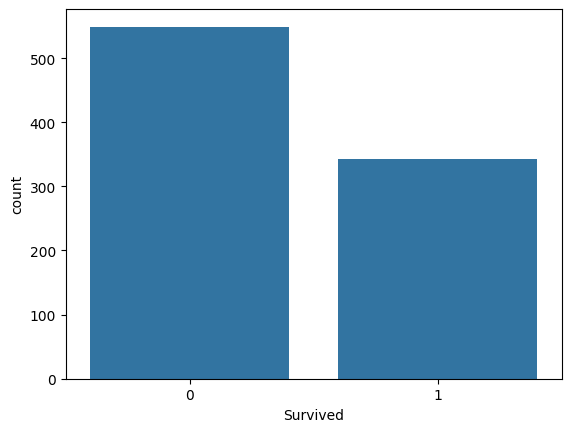

In [26]:
display(sns.countplot(x="Survived", data=data))

In [27]:
# Elimina filas con nulos
data.drop("Cabin", axis=1, inplace=True)  # Muchos nulos en la columna
data = data.dropna()

### Usa variables _dummy_ para representar las clases

In [28]:
display(pd.get_dummies(data["Sex"]))

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [29]:
data_sexo = pd.get_dummies(data["Sex"], drop_first=True)
display(data_sexo)

,male
0,True
1,False
2,False
3,False
4,True
...,...
885,False
886,True
887,False
889,True


In [30]:
data = pd.concat([data, data_sexo], axis=1)

### Se transforman booleanos a enteros

In [31]:
for col in ["male"]:
    data[col] = data[col].astype(int)

### Se seleccionan algunas columnas para el ejempo

In [32]:
data.drop(["Name", "Ticket", "Sex", "Embarked"], axis=1, inplace=True)

In [33]:
display(data.head())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


## Partición de los datos

Se reserva un subconjunto de test.

In [34]:
y_data = data["Survived"]

x_data = data.drop("Survived", axis=1)

In [35]:
#Dividir y entrenar el test
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=TEST_SPLIT_SIZE, random_state=RANDOM_STATE
)

In [36]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## Se instancian y entrenan los modelos

In [37]:
modelo_rlo_scratch =  LogisticRegression()

In [38]:
#for modelo in  
#    modelo.fit(x_train, y_train)

In [39]:
for modelo in [modelo_rlo_scratch]:
    modelo.fit(x_train, y_train)
    print(f"Modelo: {modelo}")
    print(f"Puntuación: {modelo.score(x_test, y_test)}")
    print(f"Coeficientes: {modelo.coef_}")
    print(f"Intercept: {modelo.intercept_}")

Modelo: LogisticRegression()
Puntuación: 0.8130841121495327
Coeficientes: [[ 0.20321221 -1.01218438 -0.62667468 -0.33196612  0.06507914  0.04860723
  -1.18909974]]
Intercept: [-0.49422306]


## Evaluación del modelo

En este caso se mide la **precisión** del modelo.

In [40]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [41]:
# for modelo in  # TODO: Completar
#     preds = modelo.predict(x_test)

#     print(f"Test accuracy: {round(accuracy(y_test, preds)*100)} %.")

#     print(classification_report(y_test, preds))

In [42]:
def classification_report(y_test, preds):
    tp = np.sum((y_test == 1) & (preds == 1))
    tn = np.sum((y_test == 0) & (preds == 0))
    fp = np.sum((y_test == 0) & (preds == 1))
    fn = np.sum((y_test == 1) & (preds == 0))

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    media = 2 * precision * recall / (precision + recall)

    return {
        "precision": precision,
        "sensibilidad": recall,
        "f1_score": media,
    }

In [43]:
for modelo in [modelo_rlo_scratch]:
    preds = modelo.predict(x_test)

    print(f"Test accuracy: {round(accuracy(y_test, preds)*100)} %.")

    print(classification_report(y_test, preds))

Test accuracy: 81 %.
{'precision': 0.7710843373493976, 'sensibilidad': 0.7529411764705882, 'f1_score': 0.761904761904762}


In [44]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=37)


In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
Svm = SVC(kernel='linear')
Svm.fit(X_train, y_train)
print(Svm.score(X_test, y_test))
print(Svm.score(X_train, y_train))

0.7850467289719626
0.7771084337349398


In [47]:
y_pred = Svm.predict(X_test)

In [48]:
#Precision del modelo
print(f"Test accuracy: {round(accuracy(y_test, y_pred)*100)} %.")
print(classification_report(y_test, y_pred))

Test accuracy: 79 %.
{'precision': 0.7241379310344828, 'sensibilidad': 0.7411764705882353, 'f1_score': 0.7325581395348838}
